Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import math
import seaborn as sns
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import time

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print (train.describe())					#Gives statitics of the data

X_train = train.loc[:, train.columns != 'label']
y_labels_train = train["label"]
# print (X_train)
# print (y_labels_train)

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  42000.0  42000.0  42000.0  ...  42000.000000  42000.000000   
mean       0.0      0.0      0.0  ...      0.219286      0.117095   
std        0.0      0.0      0.0  ...      6.312890      4.633819   
min        0.0      0.0      0

In [4]:
print (test.describe())					#Gives statitics of the data

X_test = test.loc[:, test.columns != 'label']
# print (X_test)

        pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776  \
count  28000.0  28000.0  ...  28000.000000  28000.000000  28000.000000   
mean       0.0      0.0  ...      0.164607      0.073214      0.028036   
std        0.0      0.0  ...      5.473293      

In [5]:
X_train = X_train.values
X_test = X_test.values

y_labels_train = y_labels_train.values
lb = preprocessing.LabelBinarizer()
lb.fit(y_labels_train)
output_classes = lb.classes_
print ("No.of Output Classes = ",output_classes)
y_train = lb.transform(y_labels_train)

No.of Output Classes =  [0 1 2 3 4 5 6 7 8 9]


{0: 4132, 1: 4684, 2: 4177, 3: 4351, 4: 4072, 5: 3795, 6: 4137, 7: 4401, 8: 4063, 9: 4188}


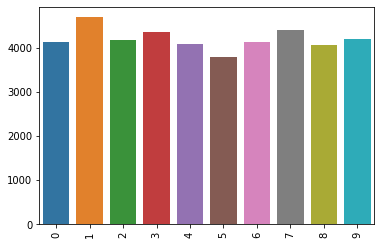

In [6]:
Data_y = {}

for i in output_classes:
    Data_y[i] = 0
for j in y_labels_train:
    Data_y[j] += 1
    
print (Data_y)
plt_ = sns.barplot(list(Data_y.keys()), list(Data_y.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

In [7]:
print ("Shape of Training Set is",X_train.shape)
print ("Shape of Test Set is",X_test.shape)

print ("Shape of Training Set is",y_train.shape)

Shape of Training Set is (42000, 784)
Shape of Test Set is (28000, 784)
Shape of Training Set is (42000, 10)


In [8]:
keras.backend.clear_session()
model = Sequential()
model.add(Dense(1024, input_dim=784, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 2,002,442
Trainable params: 2,002,442
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=64, validation_split = 0.1, batch_size = 2048)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 37800 samples, validate on 4200 samples
Epoch 1/64





37800/37800 [==============================] - 6s 172us/step - loss: 2.2132 - acc: 0.2685 - val_loss: 1.9184 - val_acc: 0.4433
Epoch 2/64
37800/37800 [==============================] - 5s 127us/step - loss: 1.5912 - acc: 0.6699 - val_loss: 1.1990 - val_acc: 0.8319
Epoch 3/64
37800/37800 [==============================] - 5s 131us/step - loss: 0.9431 - acc: 0.8715 - val_loss: 0.6884 - val_acc: 0.9038
Epoch 4/64
37800/37800 [==============================] - 5s 127us/step - loss: 0.5502 - acc: 0.9136 - val_loss: 0.4354 - val_acc: 0.9200
Epoch 5/64
37800/37800 [==============================] - 5s 139us/step - loss: 0.3657 - acc: 0.9316 - val_loss: 0.3227 - val_acc: 0.9321
Epoch 6/64
37800/37800 [==============================] - 6s 150us/step - loss: 0.2735 - acc: 0.9437 - val_loss: 0.2636 - val_acc: 0.9405
Epoch 7/64
37800/3780

37800/37800 [==============================] - 6s 169us/step - loss: 0.0589 - acc: 0.9825 - val_loss: 0.1220 - val_acc: 0.9640
Epoch 45/64
37800/37800 [==============================] - 8s 214us/step - loss: 0.0565 - acc: 0.9823 - val_loss: 0.1201 - val_acc: 0.9636
Epoch 46/64
37800/37800 [==============================] - 8s 212us/step - loss: 0.0542 - acc: 0.9825 - val_loss: 0.1235 - val_acc: 0.9633
Epoch 47/64
37800/37800 [==============================] - 8s 214us/step - loss: 0.0591 - acc: 0.9815 - val_loss: 0.1366 - val_acc: 0.9590
Epoch 48/64
37800/37800 [==============================] - 8s 210us/step - loss: 0.0564 - acc: 0.9822 - val_loss: 0.1271 - val_acc: 0.9633
Epoch 49/64
37800/37800 [==============================] - 8s 201us/step - loss: 0.0560 - acc: 0.9820 - val_loss: 0.1127 - val_acc: 0.9674
Epoch 50/64
37800/37800 [==============================] - 6s 155us/step - loss: 0.0509 - acc: 0.9843 - val_loss: 0.1233 - val_acc: 0.9619
Epoch 51/64
37800/37800 [==============

In [12]:
result = model.predict(X_test)
predictions = np.apply_along_axis(lambda row: np.argmax(row),1,result)
predictions.reshape([-1,1])

array([[2],
       [0],
       [9],
       ...,
       [3],
       [9],
       [2]])

In [13]:
print (predictions)

[2 0 9 ... 3 9 2]


In [14]:
output_test_data = pd.DataFrame() 
output_test_data['Label'] = predictions
rows = predictions.shape[0]
print (rows)
output_test_data['ImageId'] = list(np.arange(1,rows+1))
submission = output_test_data[['ImageId','Label']]
submission.to_csv("submission.csv", index=False)
submission.tail()

28000


,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2
